In [54]:
import pandas as pd

Скачаем данные: 

In [55]:
df = pd.read_excel('/Users/ksushazinoveva/Downloads/data.xlsx')

In [56]:
df['created_at'] = df['created_at'].dt.date

In [57]:
target = pd.read_excel('/Users/ksushazinoveva/Downloads/data.xlsx', 'убытки(целевая переменная)')

In [58]:
df.head()

,created_at,status,guarant_letter_uuid,comment_len,is_paid_by_patient,patient_id,has_doctor,doctor_len,diagnosis_len,diagnosis_clarification_len,...,service_status,service_quantity,service_code,folk_1_code,folk_2_code,folk_3_code,folk_4_code,service_level_3_category_hash,service_level_2_category_hash,service_level
0,2022-02-28,delivered,7f2a9c90-1599-42a4-871d-b6cfc5349f24,49,False,176587,True,0,0,0,...,0,1,0fc1c709c57b84c756e2347fc5dda380,a3dd97667c8f2bb47a7391c769e2e868,c951270e425b15fc20c64da4341c1d89,63a9f0ea7bb98050796b649e85481845,NaN,c951270e425b15fc20c64da4341c1d89,a3dd97667c8f2bb47a7391c769e2e868,3
1,2022-02-28,delivered,796f3150-a8a7-40e8-b906-13b531de7bcf,44,False,177711,True,0,0,0,...,0,1,b602362c2a586c560131d97cf5b14075,195dc214249dab3c31906b4b9f83d503,b718adec73e04ce3ec720dd11a06a308,63a9f0ea7bb98050796b649e85481845,NaN,195dc214249dab3c31906b4b9f83d503,b602362c2a586c560131d97cf5b14075,3
2,2022-02-28,delivered,a48c27f7-d645-4b49-bc49-37302b406e1c,107,False,76776,True,0,0,23,...,0,1,44d7c109bf5552287fd73a30ded5d6d6,883df3cf6bc90d69afb61c2fe31be838,c951270e425b15fc20c64da4341c1d89,63a9f0ea7bb98050796b649e85481845,NaN,c951270e425b15fc20c64da4341c1d89,883df3cf6bc90d69afb61c2fe31be838,3
3,2022-02-28,delivered,a48c27f7-d645-4b49-bc49-37302b406e1c,107,False,76776,True,0,0,23,...,0,1,746da6d65d78980c617eb8ead13a74a4,bb04f5f7eeb7aa2ca785b724a1c16752,c951270e425b15fc20c64da4341c1d89,63a9f0ea7bb98050796b649e85481845,NaN,c951270e425b15fc20c64da4341c1d89,bb04f5f7eeb7aa2ca785b724a1c16752,3
4,2022-02-28,not_delivered,482b781f-a376-4978-a712-bf0ad5fd1d30,94,False,105692,True,27,0,0,...,0,1,867de31618ddaf86ccdc872f60203135,6b4bc42634c38300eb38251b1356f64e,5d7247c6609e95d4180a71551b9d8d59,92a54b358b4cf53cca4095e4697e1004,63a9f0ea7bb98050796b649e85481845,92a54b358b4cf53cca4095e4697e1004,5d7247c6609e95d4180a71551b9d8d59,4


In [59]:
target['дата убытка'] = target['дата убытка'].dt.date
target.head()

,patient_id,дата убытка,loss
0,70772,2021-12-14,4.743
1,48418,2021-11-22,3.200
2,147869,2021-09-11,1.350
3,109626,2021-04-29,6.520
4,47870,2021-10-04,1.322


Соединим данные с таргетом: 

In [60]:
data = df.merge(target, left_on=['created_at', 'patient_id'], right_on=['дата убытка', 'patient_id'], how='inner')
data

,created_at,status,guarant_letter_uuid,comment_len,is_paid_by_patient,patient_id,has_doctor,doctor_len,diagnosis_len,diagnosis_clarification_len,...,service_code,folk_1_code,folk_2_code,folk_3_code,folk_4_code,service_level_3_category_hash,service_level_2_category_hash,service_level,дата убытка,loss
0,2022-02-28,delivered,7f2a9c90-1599-42a4-871d-b6cfc5349f24,49,False,176587,True,0,0,0,...,0fc1c709c57b84c756e2347fc5dda380,a3dd97667c8f2bb47a7391c769e2e868,c951270e425b15fc20c64da4341c1d89,63a9f0ea7bb98050796b649e85481845,NaN,c951270e425b15fc20c64da4341c1d89,a3dd97667c8f2bb47a7391c769e2e868,3,2022-02-28,5.6800
1,2022-02-28,delivered,fd747e32-0ee2-4418-84ba-e78216119ed5,301,False,85675,True,0,21,0,...,c1babc7cb238ab308da4b0a23fd604b2,NaN,63a9f0ea7bb98050796b649e85481845,NaN,NaN,b95c3d50fa47443166f7d356eaed8006,c1babc7cb238ab308da4b0a23fd604b2,2,2022-02-28,8.6165
2,2022-02-28,delivered,56344847-915f-4c42-adfe-18ac503c77cb,172,False,85675,True,0,46,0,...,993478970b98d4a20bf91e64aad312bd,b95c3d50fa47443166f7d356eaed8006,NaN,63a9f0ea7bb98050796b649e85481845,NaN,b95c3d50fa47443166f7d356eaed8006,993478970b98d4a20bf91e64aad312bd,3,2022-02-28,8.6165
3,2022-02-28,delivered,f42bde97-07a1-4235-93e9-7abfed0f398f,77,False,192505,True,0,0,0,...,431d09a75b317feddeffee19652edf60,f55e86c273940887727c2620ec18190f,c951270e425b15fc20c64da4341c1d89,63a9f0ea7bb98050796b649e85481845,NaN,c951270e425b15fc20c64da4341c1d89,f55e86c273940887727c2620ec18190f,3,2022-02-28,2.6000
4,2022-02-28,not_delivered,1c4de961-c862-47cc-aaca-30876cd55134,59,False,159670,True,0,0,0,...,0896fe692fbd93c5b34112bb28bf6a85,a8fa6b553b655657f943cb8fd85859d1,b718adec73e04ce3ec720dd11a06a308,63a9f0ea7bb98050796b649e85481845,NaN,a8fa6b553b655657f943cb8fd85859d1,0896fe692fbd93c5b34112bb28bf6a85,3,2022-02-28,2.6672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199803,2020-07-20,created,b89b13c3-89cd-4a48-a787-17b4501553cb,103,False,28160,True,0,101,0,...,79b4e4c38319f3a8c43261257f101c85,92a54b358b4cf53cca4095e4697e1004,63a9f0ea7bb98050796b649e85481845,NaN,NaN,92a54b358b4cf53cca4095e4697e1004,79b4e4c38319f3a8c43261257f101c85,2,2020-07-20,2.7500
199804,2020-07-16,not_delivered,4a131a68-2058-4569-aed0-ac60724533d2,4,False,30470,True,0,14,0,...,3539ce38f4da0e16c349d2aa7a5c3e22,bac953e88f6d79514b0b6fc42eb6f3b7,b718adec73e04ce3ec720dd11a06a308,63a9f0ea7bb98050796b649e85481845,NaN,bac953e88f6d79514b0b6fc42eb6f3b7,3539ce38f4da0e16c349d2aa7a5c3e22,3,2020-07-16,0.6560
199805,2020-07-15,delivered,3a565430-2614-4afb-922d-842994ddc5d3,129,False,33816,True,0,0,0,...,34e869b9975f3c2cebd4e63e0b4a8c87,32f0b6e1268bb0caa3463c2a4653e5d5,bac953e88f6d79514b0b6fc42eb6f3b7,b718adec73e04ce3ec720dd11a06a308,63a9f0ea7bb98050796b649e85481845,112c61a276d0376f2f6b25dd3a337b1d,32f0b6e1268bb0caa3463c2a4653e5d5,4,2020-07-15,3.9600
199806,2020-07-12,delivered,6a725de0-c54e-4fdb-8f44-f6cbfd434e59,133,False,34412,True,0,16,0,...,c1babc7cb238ab308da4b0a23fd604b2,NaN,63a9f0ea7bb98050796b649e85481845,NaN,NaN,b95c3d50fa47443166f7d356eaed8006,c1babc7cb238ab308da4b0a23fd604b2,2,2020-07-12,9.0900


In [61]:
len(df), len(data)

(547868, 199808)

In [62]:
data.to_csv('merged_data_advb.csv')

Как видно, много записей не имеет таргета вообще, их можно исключить. 

Пока что при варианте, когда человек был в один день у нескольких докторов, мы на каждую запись делаем loss за весь день, но лучше сделать среднее. 

Посмотрим на корреляцию и статистику для признаков: 

In [67]:
data.describe()

,comment_len,patient_id,doctor_len,diagnosis_len,diagnosis_clarification_len,standartized_diagnosis_len,service_status,service_quantity,service_level,loss
count,199808.000000,199808.000000,199808.000000,199808.000000,199808.000000,58044.000000,199808.000000,199808.000000,199808.000000,199808.000000
mean,240.032186,78656.886987,1.243679,63.874995,4.487888,34.044828,0.123474,1.446389,3.369089,5.749190
std,226.373761,39238.520334,5.103025,90.379259,29.754831,20.944403,0.348972,1.719730,0.657789,5.939134
min,0.000000,1129.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.100000
25%,87.000000,51585.000000,0.000000,0.000000,0.000000,21.000000,0.000000,1.000000,3.000000,2.400000
50%,177.000000,74739.000000,0.000000,40.000000,0.000000,30.000000,0.000000,1.000000,3.000000,4.000000
75%,335.000000,100790.000000,0.000000,93.000000,0.000000,40.000000,0.000000,1.000000,4.000000,7.104300
max,8442.000000,203973.000000,85.000000,2942.000000,1109.000000,178.000000,3.000000,78.000000,6.000000,206.826100


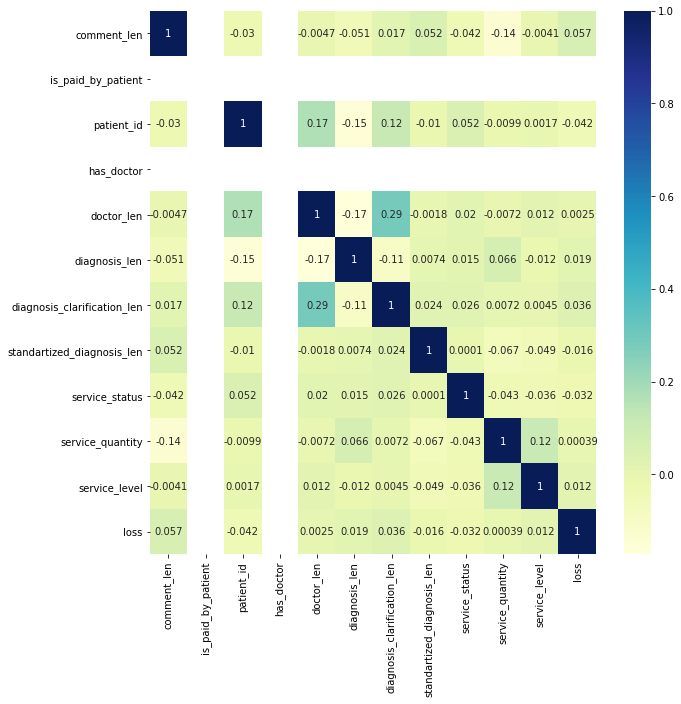

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

mp.figure(figsize = (10,10))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
mp.show()

Признаки практически не коррелируют с таргетом. Посмотрим распределения признаков и таргета:

In [69]:
data.isna().sum()

created_at                              0
status                                  0
guarant_letter_uuid                     0
comment_len                             0
is_paid_by_patient                      0
patient_id                              0
has_doctor                              0
doctor_len                              0
diagnosis_len                           0
diagnosis_clarification_len             0
standartized_diagnosis_len         141764
diagnosis_uuid                     141764
diagnosis_category_level_3_hash    141764
diagnosis_category_level_1_hash    141764
service_status                          0
service_quantity                        0
service_code                         1121
folk_1_code                           457
folk_2_code                          1400
folk_3_code                         10793
folk_4_code                        124723
service_level_3_category_hash        1121
service_level_2_category_hash        1121
service_level                     

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


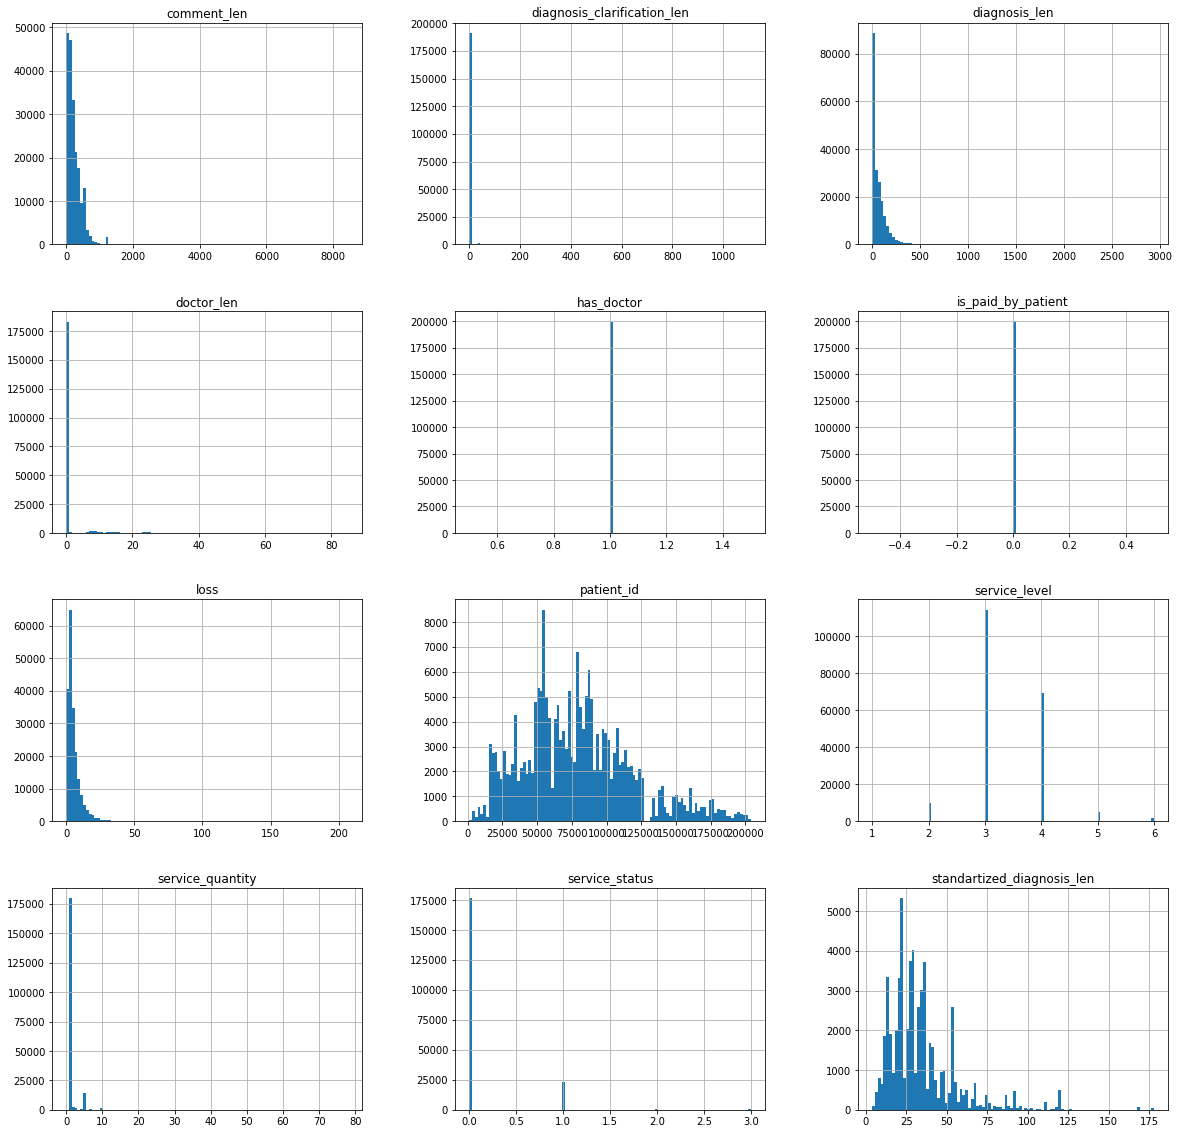

In [70]:
data.hist(figsize = (20, 20), bins = 100);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbef99dd290>]],
      dtype=object)

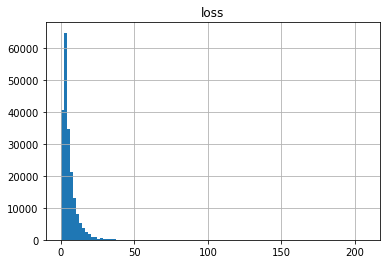

In [71]:
data.hist('loss', bins=100)

Рассмотрим признаки, в которых очень много Nan, возможно их стоит не рассматривать вообще (например diagnosis_category_level_3_hash, diagnosis_category_level_1_hash, diagnosis_uuid). Остальные заполним 0 или пустой строкой. 

In [72]:
data['standartized_diagnosis_len'].fillna(0, inplace = True)

In [73]:
data['service_code'].fillna('', inplace = True)

In [74]:
data['folk_1_code'].fillna('', inplace = True)

In [75]:
data['folk_2_code'].fillna('', inplace = True)

In [76]:
data['service_level_3_category_hash'].fillna('', inplace = True)

In [77]:
data['service_level_2_category_hash'].fillna('', inplace = True)

In [78]:
data.drop(columns = ['diagnosis_uuid',
                     'diagnosis_category_level_3_hash', 'diagnosis_category_level_1_hash', 'folk_3_code', 'folk_4_code']
         , inplace = True)

In [79]:
data.isna().any()

created_at                       False
status                           False
guarant_letter_uuid              False
comment_len                      False
is_paid_by_patient               False
patient_id                       False
has_doctor                       False
doctor_len                       False
diagnosis_len                    False
diagnosis_clarification_len      False
standartized_diagnosis_len       False
service_status                   False
service_quantity                 False
service_code                     False
folk_1_code                      False
folk_2_code                      False
service_level_3_category_hash    False
service_level_2_category_hash    False
service_level                    False
дата убытка                      False
loss                             False
dtype: bool

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size=0.2)
y_train = X_train['loss']
y_test = X_test['loss']

Попробуем несколько моделей на тех признаках, которые мы имеем сейчас: 

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error


categorical_features = ["created_at", "status", "guarant_letter_uuid", "is_paid_by_patient", "has_doctor", 
                       "service_code", "folk_1_code", "folk_2_code", "service_level_3_category_hash", 
                       "service_level_2_category_hash"]

numeric_features = ["comment_len", "doctor_len", "diagnosis_len", "diagnosis_clarification_len", "standartized_diagnosis_len",
                    "service_status", "service_quantity", "service_level"]

features = numeric_features + categorical_features

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("R2 = ", r2_score(y_test, y_pred), "\n", "MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False)) 
      #"MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

R2 =  0.7742037143165166 
 MAE =  1.3333918833324656 
 MSE =  8.271698460181032 
 RMSE =  2.876056059985798


Lasso Regression:

In [82]:
from sklearn.linear_model import Lasso
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("R2 = ", r2_score(y_test, y_pred), "\n", "MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False)) 
      #"MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

R2 =  -5.9667143643915566e-05 
 MAE =  3.689172188772871 
 MSE =  36.63564253841191 
 RMSE =  6.052738433007981


Decision Tree:

In [89]:
from sklearn.tree import DecisionTreeRegressor
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', DecisionTreeRegressor(max_depth = 100))
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("R2 = ", r2_score(y_test, y_pred), "\n", "MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False)) 
      #"MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

R2 =  0.40467639003402345 
 MAE =  3.08473491064489 
 MSE =  21.808761702873248 
 RMSE =  4.66998519300364


Catboost:

In [100]:
from catboost import CatBoostRegressor

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', CatBoostRegressor(iterations = 500, verbose = False))
])

model = pipeline.fit(X_train[features], y_train)
y_pred = model.predict(X_test[features])

print("R2 = ", r2_score(y_test, y_pred), "\n", "MAE = ",  mean_absolute_error(y_test, y_pred), '\n',
     "MSE = ", mean_squared_error(y_test, y_pred), '\n', "RMSE = ", mean_squared_error(y_test, y_pred, squared = False)) 
      #"MAPE = ", mean_absolute_percentage_error(y_test, y_pred))

R2 =  0.3256907717967885 
 MAE =  3.353867249169129 
 MSE =  25.26422523105335 
 RMSE =  5.026353074650979
